<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.-Testing" data-toc-modified-id="3.-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3. Testing</a></span><ul class="toc-item"><li><span><a href="#3-1.-Data&amp;Model-selection" data-toc-modified-id="3-1.-Data&amp;Model-selection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>3-1. Data&amp;Model selection</a></span></li><li><span><a href="#3-2.-Testing" data-toc-modified-id="3-2.-Testing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>3-2. Testing</a></span></li><li><span><a href="#3-3.-Save-Result" data-toc-modified-id="3-3.-Save-Result-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3-3. Save Result</a></span></li></ul></li></ul></div>

In [1]:
import sys, os
import pandas as pd
import numpy as np
import setting
import pathSetting
sys.path.append("../../..")

from KETIToolDL.CLUSTTool.common import p1_integratedDataSaving as p1
from KETIToolDL.CLUSTTool.common import p2_dataSelection as p2
from KETIToolDL.CLUSTTool.common import p3_training as p3
from KETIToolDL.CLUSTTool.common import p4_testing as p4
from KETIToolDL.CLUSTTool.Semi import p4_testing as p4S

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

c:\Users\korea\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda is available.


# 3. Testing
## 3-1. Data&Model selection

In [2]:
# Test Data & Model
# 1-1. 저장 Data 확인
DataMeta = p1.readJsonData(pathSetting.DataMetaPath)
dataList =  list(DataMeta.keys())
dataList

['ML_testX_ActionPatternData_Split3',
 'ML_testy_ActionPatternData_Split3',
 'ML_trainX_ActionPatternData_Split3',
 'ML_trainy_ActionPatternData_Split3',
 'trainX_ActionPatternData_Split3',
 'trainy_ActionPatternData_SplitNone',
 'testX_ActionPatternData_Split3',
 'testy_ActionPatternData_SplitNone']

In [3]:
dataList[2] , dataList[3]

('ML_trainX_ActionPatternData_Split3', 'ML_trainy_ActionPatternData_Split3')

In [4]:
# 1-2. Select Test Data
## dataX
dataName_X = dataList[2]
## datay
dataName_y = dataList[3]
dataFolderName = "data_integrated_result"

# 1-3. 저장 Model 확인
ModelMeta =p1.readJsonData(pathSetting.trainModelMetaFilePath)
modelList = list(ModelMeta.keys())
modelList

['ML_trainX_ActionPatternData_Split3_FC_cf',
 'ML_trainX_ActionPatternData_Split3_LSTM_cf',
 'ML_trainX_ActionPatternData_Split3_SMATE_cf',
 'ML_trainX_ActionPatternData_Split3_SemiTime_cf']

In [5]:
# 1-4. select Model -> module 때문에 모델 이름 변경 (SMATE_cf, SemiTime_cf 위치 보고 변경)
modelName = modelList[2]
windows = DataMeta[dataName_X]["integrationInfo"]["dataInfo"]["windows"]

In [6]:
# 1-5. 선택한 Model 확인-> 엄밀히 하면, HAR_raw data의 SMATE_cf 모델이 들어가 있음
modelName

'ML_trainX_ActionPatternData_Split3_SMATE_cf'

## 3-2. Testing

In [7]:
DataMeta

{'ML_testX_ActionPatternData_Split3': {'integrationInfo': {'startTime': '2022-02-01',
   'endTime': '2022-02-01 03:16:24',
   'dataInfo': {'windows': 1,
    'dataSize': '94304',
    'timeElapsed': '0:00:22.175951'},
   'processParam': {'refine_param': {'removeDuplication': {'flag': False},
     'staticFrequency': {'flag': False, 'frequency': None}},
    'outlier_param': {'certainErrorToNaN': {'flag': False},
     'unCertainErrorToNaN': {'flag': False, 'param': {}}},
    'imputation_param': {'serialImputation': {'flag': False,
      'imputation_method': [],
      'totalNonNanRatio': 80}}},
   'integration_freq_sec': 4,
   'cleanParam': 'NoClean',
   'DataSaveMode': 'CSV'}},
 'ML_testy_ActionPatternData_Split3': {'integrationInfo': {'startTime': '2022-02-01',
   'endTime': '2022-02-01 00:49:06',
   'dataInfo': {'windows': 1,
    'dataSize': '2947',
    'timeElapsed': '0:00:22.175951'},
   'processParam': {'refine_param': {'removeDuplication': {'flag': False},
     'staticFrequency': {'fl

In [8]:
ModelMeta

{'ML_trainX_ActionPatternData_Split3_FC_cf': {'author': 'KETI',
  'modelName': 'ML_trainX_ActionPatternData_Split3_FC_cf',
  'modelVersion': 0.1,
  'trainDataInfo': {'startTime': '2022-01-01',
   'endTime': '2022-01-01 08:10:04',
   'dataInfo': {'windows': 1,
    'dataSize': '235264',
    'timeElapsed': '0:00:52.012849'},
   'processParam': {'refine_param': {'removeDuplication': {'flag': False},
     'staticFrequency': {'flag': False, 'frequency': None}},
    'outlier_param': {'certainErrorToNaN': {'flag': False},
     'unCertainErrorToNaN': {'flag': False, 'param': {}}},
    'imputation_param': {'serialImputation': {'flag': False,
      'imputation_method': [],
      'totalNonNanRatio': 80}}},
   'integration_freq_sec': 4,
   'cleanParam': 'NoClean',
   'DataSaveMode': 'CSV'},
  'featureList': ['concat_emb1',
   'concat_emb2',
   'concat_emb3',
   'concat_emb4',
   'concat_emb5',
   'concat_emb6',
   'concat_emb7',
   'concat_emb8',
   'concat_emb9',
   'concat_emb10',
   'concat_emb1

In [9]:
# 2. Testing
# 2-1. Read Parameter and model information and Testing
# load data 부분이 DataMeta를 통해 불러오지 않고, 간단히 raw 데이터를 불러서 getTestResult에 넣어주는 형식 으로 우선 변경

folderAddress = './data/'
model_list = ["SemiTime_cf", "SMATE_cf"]
model_method = model_list[1]
split_ratio = 0.2
scaler_x_path = './scaler/HAR_temp_minmax_scaler_x_semi.pkl'
train_x, train_y,test_x, test_y = setting.load_data(folderAddress, model_method)
test_x, x_scaler = setting.get_test_data(test_x, scaler_x_path)

(7352, 128, 9)
(7352,)
(2947, 128, 9)
(2947,)


In [10]:
# SMATE 알고리즘에서 train_x, train_y 필요
df_result, result_metrics, acc, auroc = p4S.getTestResult(train_x, train_y, test_x, test_y, modelName, DataMeta, ModelMeta, dataFolderName, device, windows)
# df_result, result_metrics, acc= p4C.getTestResult(dataName_X, dataName_y, modelName, DataMeta, ModelMeta, dataFolderName, device, windows)

c:\Users\korea\anaconda3\envs\torch\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Start testing model: SMATE_cf


c:\Users\korea\anaconda3\envs\torch\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


acc_svm :  0.5310485239226331  // acc_svm_linear :  0.5062775704105871
Best performance :  0.5310485239226331


c:\Users\korea\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korea\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korea\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korea\anacond

In [11]:
df_result

,actual_value,predicted_value,prob0,prob1,prob2,prob3,prob4,prob5
0,4.0,3.0,5.752100e-07,4.022980e-07,2.794383e-07,0.999898,9.942294e-07,0.000099
1,4.0,3.0,1.070441e-07,7.379815e-08,5.250481e-08,0.999932,2.679184e-07,0.000067
2,4.0,3.0,8.704147e-08,5.977488e-08,4.283906e-08,0.999936,2.372397e-07,0.000063
3,4.0,3.0,6.007650e-08,4.129480e-08,2.960682e-08,0.999943,1.945804e-07,0.000057
4,4.0,3.0,4.753795e-08,3.267827e-08,2.345845e-08,0.999944,1.746751e-07,0.000055
...,...,...,...,...,...,...,...,...
2942,1.0,0.0,5.240267e-01,4.663615e-01,7.822697e-03,0.000714,4.088469e-04,0.000666
2943,1.0,1.0,1.897840e-01,8.007919e-01,7.414093e-03,0.000705,4.889961e-04,0.000816
2944,1.0,1.0,1.936003e-01,8.021139e-01,1.818671e-03,0.001149,4.775276e-04,0.000841
2945,1.0,1.0,1.713619e-01,8.222600e-01,1.383086e-03,0.002401,1.159391e-03,0.001435


{0.0, 1.0, 3.0, 5.0}

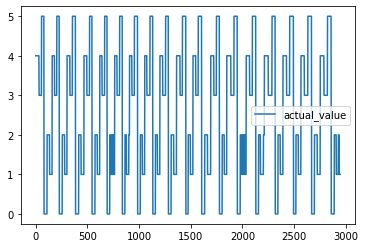

In [12]:
# 2-2. Result
df_result[['actual_value']].plot()
set(df_result['predicted_value'].values)

In [13]:
# 2-3. result_metrics 확인
result_metrics

{'0.0': {'precision': 0.39575289575289574,
  'recall': 0.41330645161290325,
  'f1-score': 0.40433925049309666,
  'support': 496},
 '1.0': {'precision': 0.38927738927738925,
  'recall': 0.7091295116772823,
  'f1-score': 0.5026335590669676,
  'support': 471},
 '2.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 420},
 '3.0': {'precision': 0.47292069632495165,
  'recall': 0.9959266802443992,
  'f1-score': 0.641311475409836,
  'support': 491},
 '4.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 532},
 '5.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 537},
 'accuracy': 0.5310485239226331,
 'macro avg': {'precision': 0.37632516355920614,
  'recall': 0.5197271072557642,
  'f1-score': 0.42471404749498337,
  'support': 2947},
 'weighted avg': {'precision': 0.3898361549164024,
  'recall': 0.5310485239226331,
  'f1-score': 0.437453888358109,
  'support': 2947}}

In [14]:
# 2-4. 정확도 확인
acc

0.5310485239226331

## 3-3. Save Result

In [15]:
# 3. Save Result
import json
save_path = './modelResult'
os.makedirs(save_path, exist_ok=True)

with open('./modelResult/{}_result.json'.format(modelName),'w') as f:
  json.dump(result_metrics, f, ensure_ascii=False, indent=4)